**Problem Statement**

The objective of this project is to develop a machine learning model that can accurately predict the popularity score of a song based on its audio features, metadata, and artist-related information.

By leveraging regression algorithms such as Linear Regression, Ridge, Lasso, Random Forest, XGBoost, AdaBoost, and Gradient Boosting — tuned via GridSearchCV and RandomizedSearchCV — the goal is to identify the most effective approach for modeling song popularity.

The model aims to assist music streaming platforms, producers, and artists in forecasting the potential success of tracks before release, enabling better decision-making for marketing strategies, playlist placements, and production investments.

**Dataset Info : Column Description**

**track_id:** The Spotify ID for the track

**artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;

**album_name:** The album name in which the track appears

**track_name:** Name of the track

**popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

**duration_ms:** The track length in milliseconds

**explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

**loudness:** The overall loudness of a track in decibels (dB)

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

**time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

**track_genre:** The genre in which the track belongs


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

**Data Loading**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


**Data Cleaning**

In [3]:
df.drop(columns = ['Unnamed: 0', 'track_id'], inplace = True)
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df.isnull().sum()

,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
loudness,0


In [5]:
df.dropna(subset = ['artists','album_name','track_name'], inplace = True)

In [6]:
print(df.isnull().sum())
print(df.shape)

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
(113999, 19)


In [7]:
df.duplicated().sum()

np.int64(577)

In [8]:
df.drop_duplicates(inplace = True)
print(df.shape)
print(df.duplicated().sum())

(113422, 19)
0


In [9]:
df.dtypes

,0
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64
loudness,float64


In [10]:
df['duration in mins'] = df['duration_ms'] * 0.00001667
df.drop(columns = ['duration_ms'], inplace = True)
df

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration in mins
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.845202
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493999
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.514469
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.366223
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.417933
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.417950
113997,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.525338
113998,Michael W. Smith,Change Your World,Friends,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.732496


In [11]:
df['signature time'] = df['time_signature']
df['genre of track'] = df['track_genre']
df['name of track'] = df['track_name']
df['name of album'] = df['album_name']

df.drop(columns = ['time_signature','track_genre','track_name','album_name'], inplace = True)
df

,artists,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration in mins,signature time,genre of track,name of track,name of album
0,Gen Hoshino,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,3.845202,4,acoustic,Comedy,Comedy
1,Ben Woodward,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,2.493999,4,acoustic,Ghost - Acoustic,Ghost (Acoustic)
2,Ingrid Michaelson;ZAYN,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,3.514469,4,acoustic,To Begin Again,To Begin Again
3,Kina Grannis,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.366223,3,acoustic,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...
4,Chord Overstreet,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,3.314880,4,acoustic,Hold On,Hold On
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,6.417933,5,world-music,Sleep My Little Boy,#mindfulness - Soft Rain for Mindful Meditatio...
113996,Rainy Lullaby,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,6.417950,4,world-music,Water Into Light,#mindfulness - Soft Rain for Mindful Meditatio...
113997,Cesária Evora,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4.525338,4,world-music,Miss Perfumado,Best Of
113998,Michael W. Smith,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4.732496,4,world-music,Friends,Change Your World


**Data Preprocessing**

In [12]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration in mins,signature time
count,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000
mean,33.359674,0.567113,0.642174,5.309332,-8.242913,0.637681,0.084697,0.314075,0.155802,0.213610,0.474239,122.176181,3.802446,3.904225
std,22.269626,0.173402,0.251031,3.559767,5.011931,0.480673,0.105803,0.331943,0.309314,0.190481,0.259239,29.972104,1.774534,0.432077
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143129,0.000000
25%,17.000000,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.299000,2.903414,4.000000
50%,35.000000,0.580000,0.685000,5.000000,-6.996000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.019000,3.550977,4.000000
75%,50.000000,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084575,0.596000,0.048700,0.273000,0.683000,140.073000,4.360872,4.000000
max,100.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,87.305708,5.000000


In [13]:
df.describe(include = 'object')

,artists,genre of track,name of track,name of album
count,113422,113422,113422,113422
unique,31437,114,73608,46589
top,The Beatles,acoustic,Run Rudolph Run,Feliz Cumpleaños con Perreo
freq,279,1000,151,180


In [14]:
num_cols = df.select_dtypes(include = ['int64', 'float64'])
skew_data = num_cols.skew()
skew_data

,0
popularity,0.041143
danceability,-0.400887
energy,-0.599251
key,-0.008627
loudness,-2.014057
mode,-0.572876
speechiness,4.643524
acousticness,0.730326
instrumentalness,1.736638
liveness,2.105301


<Axes: ylabel='Density'>

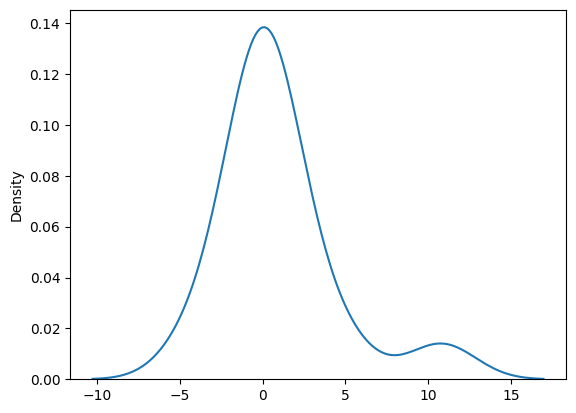

In [15]:
sns.kdeplot(skew_data)

In [16]:
num_cols = df.select_dtypes(include = ['int64', 'float64'])
kurtosis_data = num_cols.kurtosis()
kurtosis_data

,0
popularity,-0.921977
danceability,-0.180239
energy,-0.518500
key,-1.276457
loudness,5.965378
mode,-1.671842
speechiness,28.772087
acousticness,-0.943643
instrumentalness,1.279021
liveness,4.373937


<Axes: ylabel='Density'>

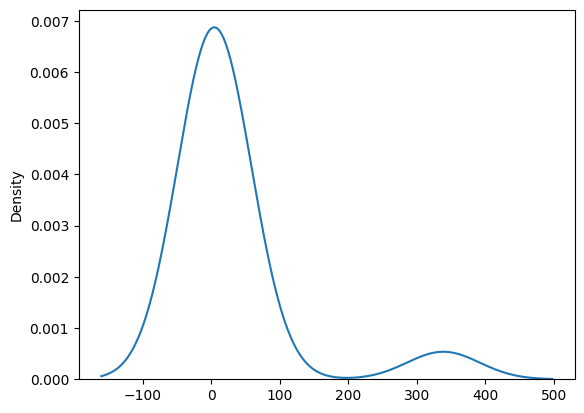

In [17]:
sns.kdeplot(kurtosis_data)

In [18]:
## Checking Multi Collinearity in the dataset

# Only use numeric columns
X = df.select_dtypes(include='number').drop(columns = ['popularity'])  # Drop target variable if supervised learning
X = add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             feature         VIF
0              const  182.878790
1       danceability    1.535641
2             energy    4.247553
3                key    1.021448
4           loudness    3.267630
5               mode    1.041779
6        speechiness    1.129121
7       acousticness    2.407461
8   instrumentalness    1.461418
9           liveness    1.142214
10           valence    1.572980
11             tempo    1.091093
12  duration in mins    1.055094
13    signature time    1.080479


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113422 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113422 non-null  object 
 1   popularity        113422 non-null  int64  
 2   explicit          113422 non-null  bool   
 3   danceability      113422 non-null  float64
 4   energy            113422 non-null  float64
 5   key               113422 non-null  int64  
 6   loudness          113422 non-null  float64
 7   mode              113422 non-null  int64  
 8   speechiness       113422 non-null  float64
 9   acousticness      113422 non-null  float64
 10  instrumentalness  113422 non-null  float64
 11  liveness          113422 non-null  float64
 12  valence           113422 non-null  float64
 13  tempo             113422 non-null  float64
 14  duration in mins  113422 non-null  float64
 15  signature time    113422 non-null  int64  
 16  genre of track    113422 

**Exploratory Data Analysis**

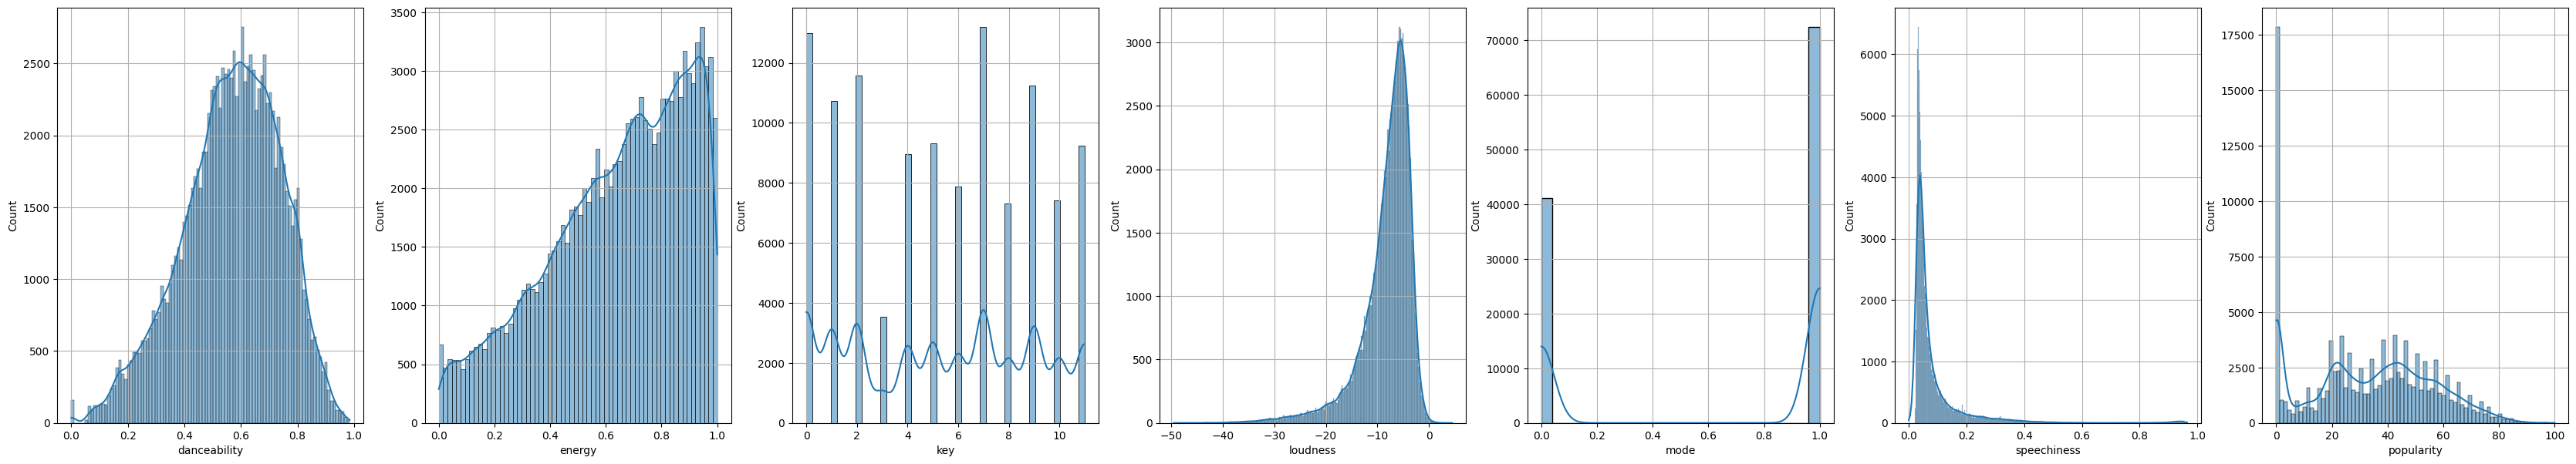

In [20]:
## Checking Distribution of each numeric columns

plt.figure(figsize = (42,7))

plt.subplot(1,7,1)
sns.histplot(df['danceability'], kde = True)
plt.grid(True)

plt.subplot(1,7,2)
sns.histplot(df['energy'], kde = True)
plt.grid(True)

plt.subplot(1,7,3)
sns.histplot(df['key'], kde = True)
plt.grid(True)

plt.subplot(1,7,4)
sns.histplot(df['loudness'], kde = True)
plt.grid(True)

plt.subplot(1,7,5)
sns.histplot(df['mode'], kde = True)
plt.grid(True)

plt.subplot(1,7,6)
sns.histplot(df['speechiness'], kde = True)
plt.grid(True)

plt.subplot(1,7,7)
sns.histplot(df['popularity'], kde = True)
plt.grid(True)

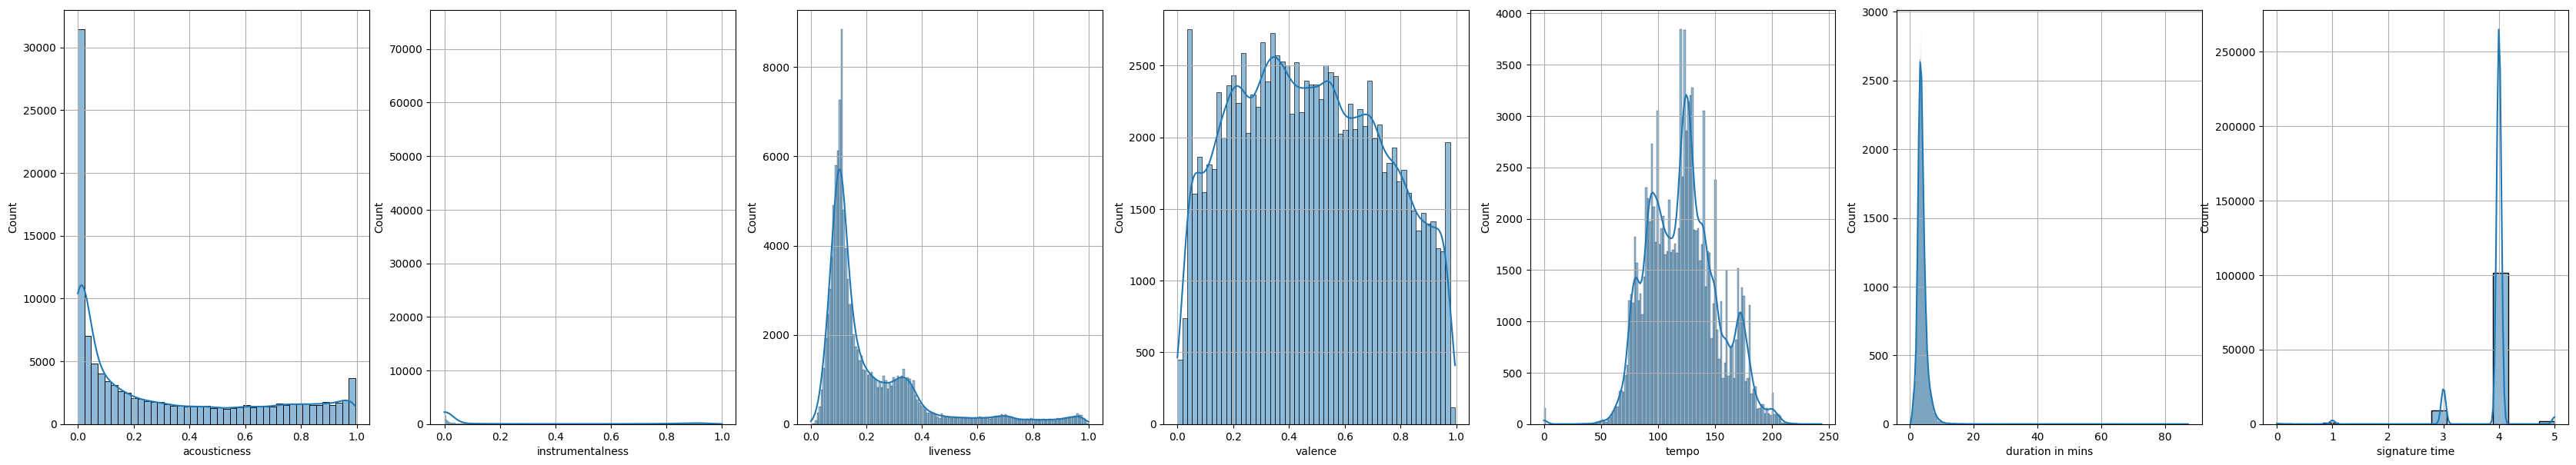

In [21]:
## Checking Distribution of each numeric columns

plt.figure(figsize = (42,7))

plt.subplot(1,7,1)
sns.histplot(df['acousticness'], kde = True)
plt.grid(True)

plt.subplot(1,7,2)
sns.histplot(df['instrumentalness'], kde = True)
plt.grid(True)

plt.subplot(1,7,3)
sns.histplot(df['liveness'], kde = True)
plt.grid(True)

plt.subplot(1,7,4)
sns.histplot(df['valence'], kde = True)
plt.grid(True)

plt.subplot(1,7,5)
sns.histplot(df['tempo'], kde = True)
plt.grid(True)

plt.subplot(1,7,6)
sns.histplot(df['duration in mins'], kde = True)
plt.grid(True)

plt.subplot(1,7,7)
sns.histplot(df['signature time'], kde = True)
plt.grid(True)

<Axes: ylabel='popularity'>

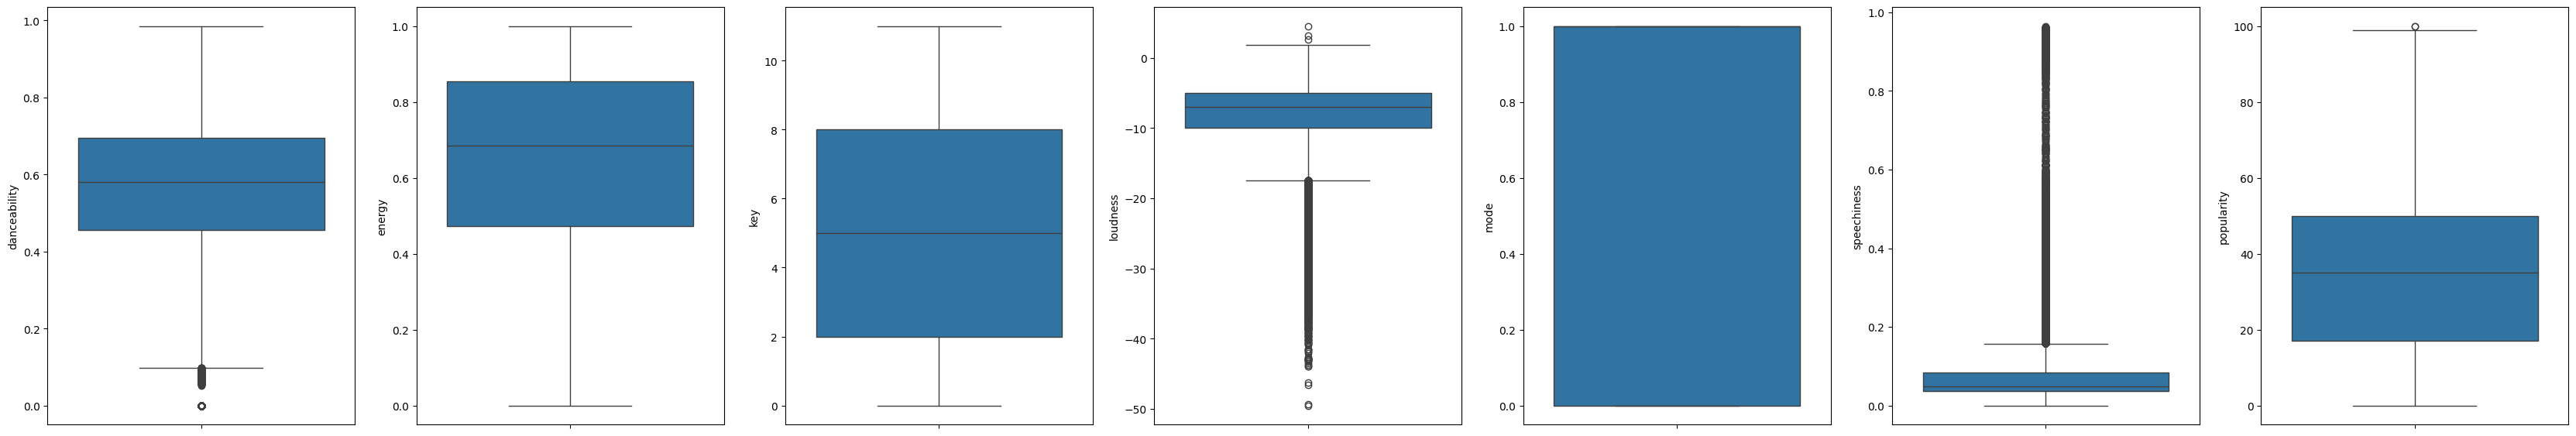

In [22]:
## Checking the outliers by plotting Boxplot of each numeric cols

plt.figure(figsize = (42,7))

plt.subplot(1,7,1)
sns.boxplot(df['danceability'])

plt.subplot(1,7,2)
sns.boxplot(df['energy'])

plt.subplot(1,7,3)
sns.boxplot(df['key'])

plt.subplot(1,7,4)
sns.boxplot(df['loudness'])

plt.subplot(1,7,5)
sns.boxplot(df['mode'])

plt.subplot(1,7,6)
sns.boxplot(df['speechiness'])

plt.subplot(1,7,7)
sns.boxplot(df['popularity'])

<Axes: ylabel='signature time'>

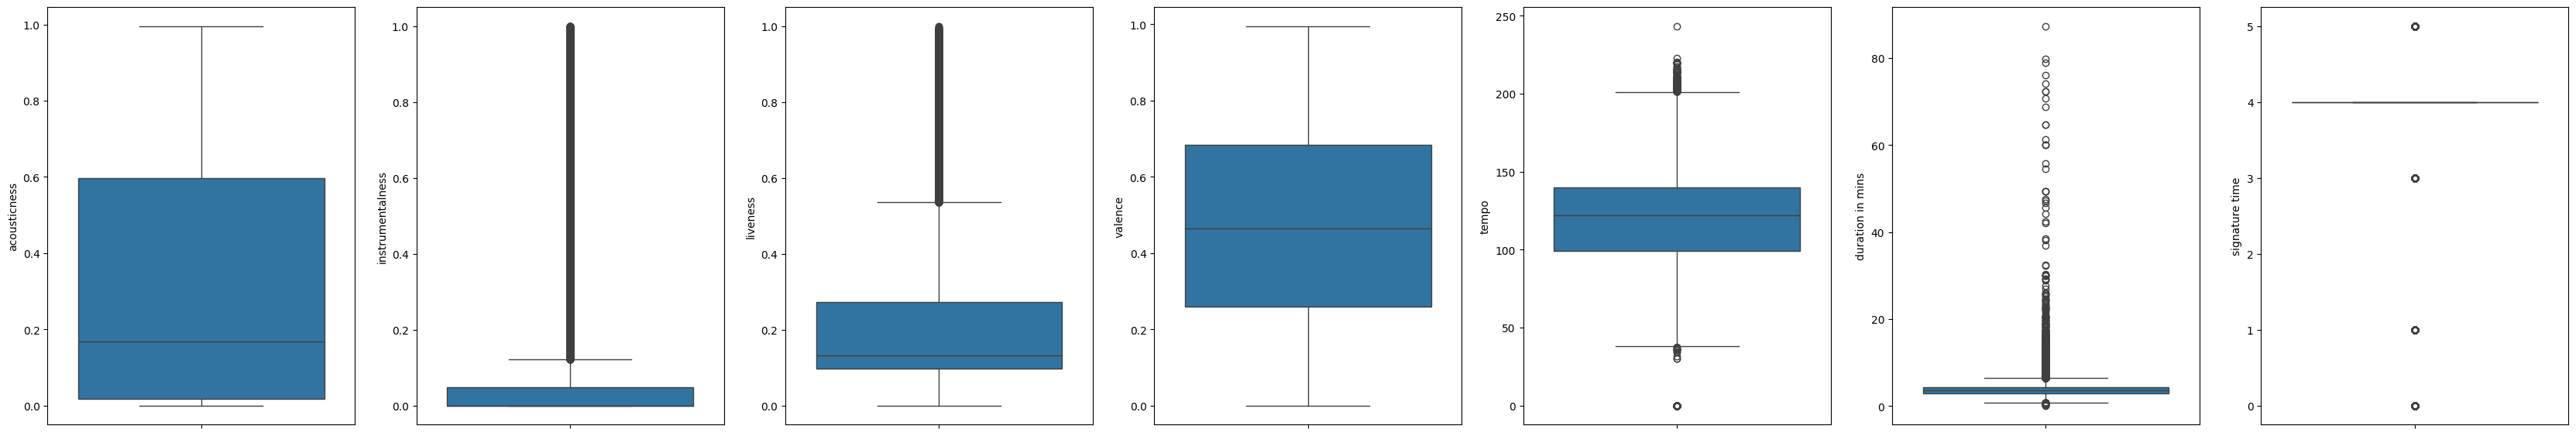

In [23]:
## Checking the outliers by plotting Boxplot of each numeric cols

plt.figure(figsize = (42,7))

plt.subplot(1,7,1)
sns.boxplot(df['acousticness'])

plt.subplot(1,7,2)
sns.boxplot(df['instrumentalness'])

plt.subplot(1,7,3)
sns.boxplot(df['liveness'])

plt.subplot(1,7,4)
sns.boxplot(df['valence'])

plt.subplot(1,7,5)
sns.boxplot(df['tempo'])

plt.subplot(1,7,6)
sns.boxplot(df['duration in mins'])

plt.subplot(1,7,7)
sns.boxplot(df['signature time'])

In [24]:
# Feature Engineering : Making a new col "Popularity Category using Popularity score"

# Define bins and labels
bins = [0, 25, 50, 75, 100]
labels = ['Emerging', 'Up and Coming', 'Mainstream Hits', 'Chart Toppers']

# Create new column
df['popularity category'] = pd.cut(df['popularity'], bins=bins, labels=labels, include_lowest=True)

# Preview result
df[['popularity', 'popularity category']]

,popularity,popularity category
0,73,Mainstream Hits
1,55,Mainstream Hits
2,57,Mainstream Hits
3,71,Mainstream Hits
4,82,Chart Toppers
...,...,...
113995,21,Emerging
113996,22,Emerging
113997,22,Emerging
113998,41,Up and Coming


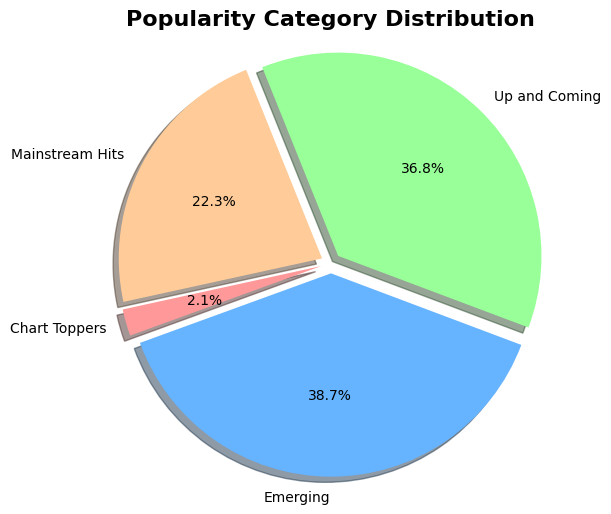

In [25]:
## Popularity Category Distribution

# Calculate counts
category_counts = df['popularity category'].value_counts()

# Custom colors and explode effect
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']
explode = [0.05] * len(category_counts)  # slight separation

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle= 200,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title('Popularity Category Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')  # Perfect circle
plt.show()

In [26]:
## Multivariate Analysis : Checking the relationship b/w different numeric cols

corr_matrix = df.corr(numeric_only= True)
corr_matrix

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration in mins,signature time
popularity,1.000000,0.044543,0.033795,-0.002976,-0.004077,0.047268,-0.014434,-0.045825,-0.022415,-0.095300,-0.005678,-0.041328,0.012151,-0.008219,0.030580
explicit,0.044543,1.000000,0.122022,0.096166,0.004477,0.107789,-0.037298,0.307583,-0.093416,-0.103067,0.032521,-0.004077,-0.003581,-0.065749,0.037855
danceability,0.033795,0.122022,1.000000,0.131452,0.036291,0.256461,-0.069524,0.108020,-0.169145,-0.184030,-0.131636,0.476743,-0.051744,-0.074215,0.207204
energy,-0.002976,0.096166,0.131452,1.000000,0.047848,0.760545,-0.079399,0.141871,-0.732797,-0.180133,0.184712,0.258086,0.247308,0.058297,0.186647
key,-0.004077,0.004477,0.036291,0.047848,1.000000,0.038138,-0.136099,0.020615,-0.040993,-0.006842,-0.001398,0.034202,0.010671,0.008729,0.015249
loudness,0.047268,0.107789,0.256461,0.760545,0.038138,1.000000,-0.042179,0.059971,-0.588066,-0.432198,0.076662,0.279165,0.212121,-0.004060,0.191772
mode,-0.014434,-0.037298,-0.069524,-0.079399,-0.136099,-0.042179,1.000000,-0.046652,0.096603,-0.050663,0.013946,0.021440,0.000340,-0.035946,-0.024277
speechiness,-0.045825,0.307583,0.108020,0.141871,0.020615,0.059971,-0.046652,1.000000,-0.001252,-0.089300,0.205243,0.036278,0.017012,-0.063182,-0.000492
acousticness,-0.022415,-0.093416,-0.169145,-0.732797,-0.040993,-0.588066,0.096603,-0.001252,1.000000,0.102091,-0.020311,-0.106025,-0.207452,-0.103815,-0.175661
instrumentalness,-0.095300,-0.103067,-0.184030,-0.180133,-0.006842,-0.432198,-0.050663,-0.089300,0.102091,1.000000,-0.079832,-0.324363,-0.049858,0.125191,-0.082031


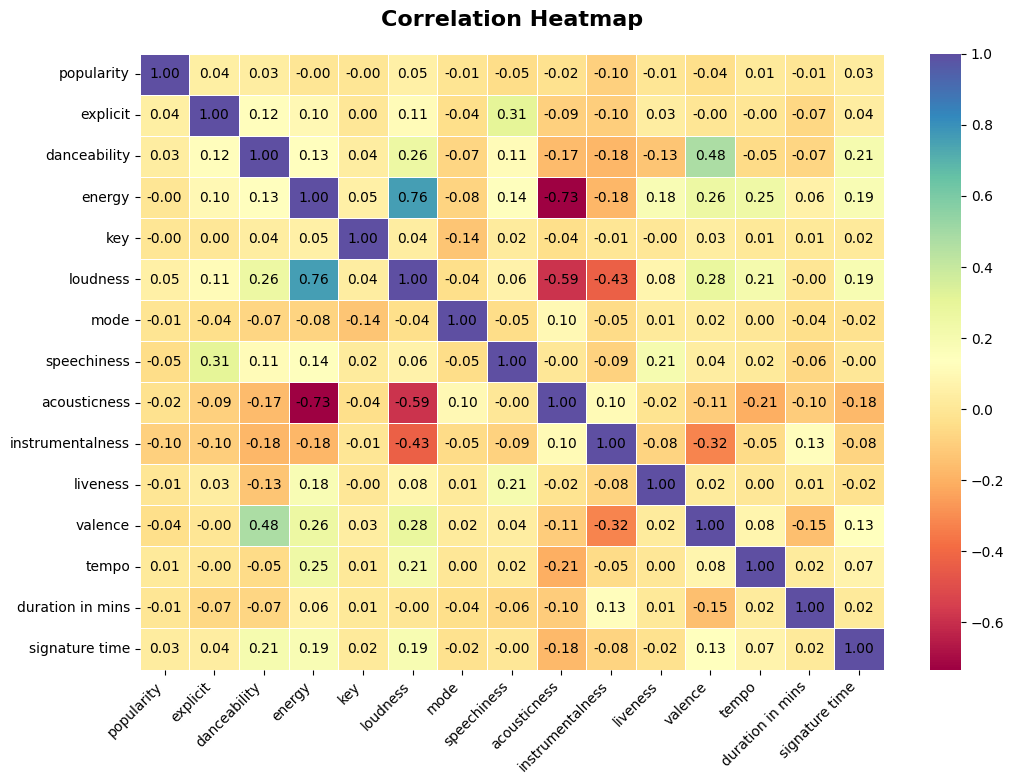

In [27]:
## Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="Spectral",
    annot_kws={"size":10, "color":"black"}  # Customize annotation
)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

/tmp/ipython-input-2198417256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='genre of track', order=df['genre of track'].value_counts().index, palette="Set2")


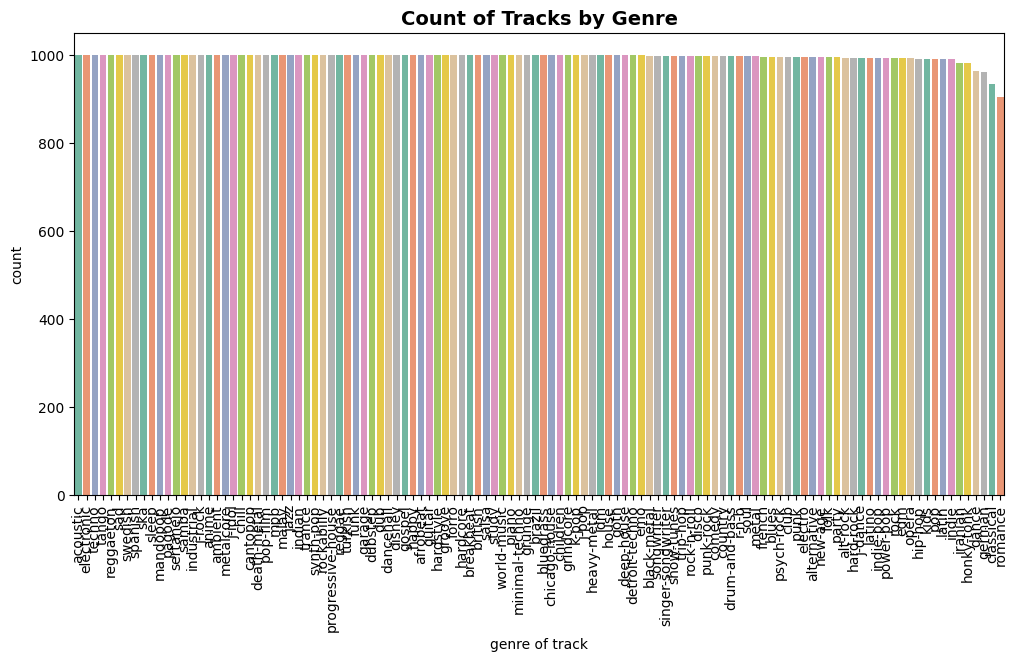

/tmp/ipython-input-2198417256.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='explicit', palette="coolwarm")


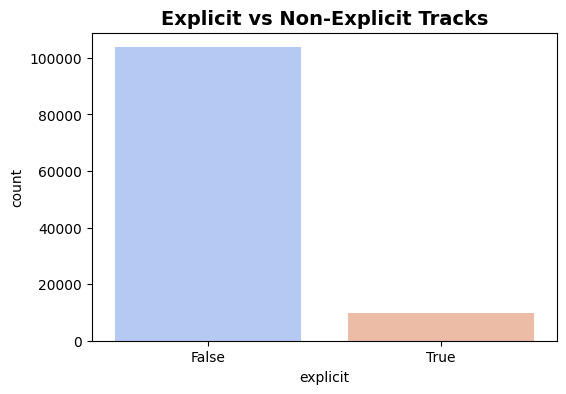

/tmp/ipython-input-2198417256.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mode', palette="coolwarm")


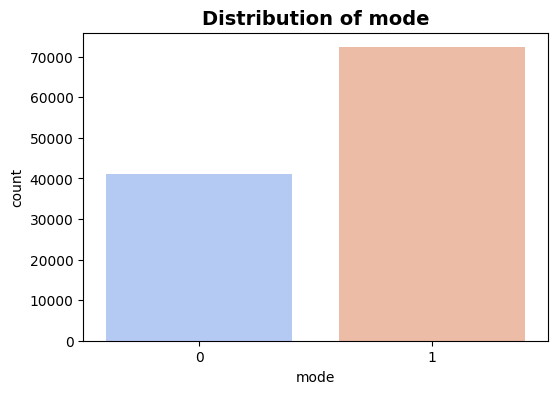

In [28]:
## Univariate Analysis

# Count plot for track_genre
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='genre of track', order=df['genre of track'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title("Count of Tracks by Genre", fontsize=14, fontweight='bold')
plt.show()

# Count plot for explicit
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='explicit', palette="coolwarm")
plt.title("Explicit vs Non-Explicit Tracks", fontsize=14, fontweight='bold')
plt.show()

# Count plot for mode
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='mode', palette="coolwarm")
plt.title("Distribution of mode", fontsize=14, fontweight='bold')
plt.show()

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


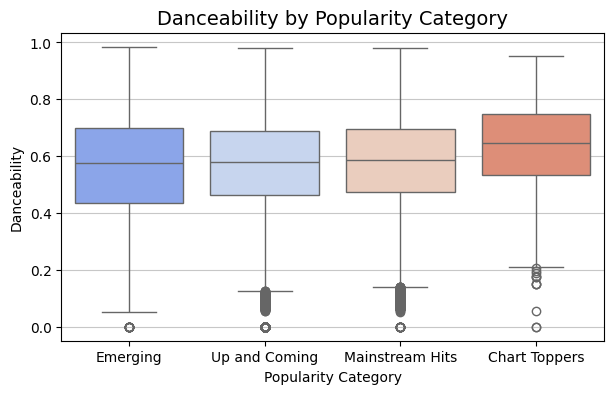

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


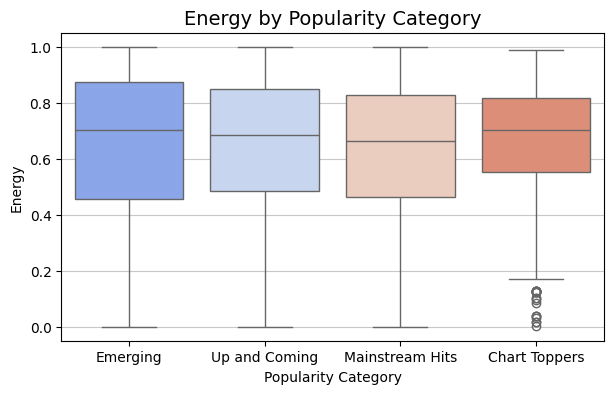

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


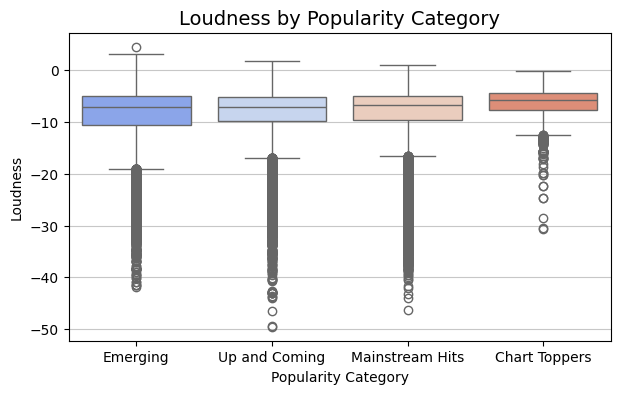

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


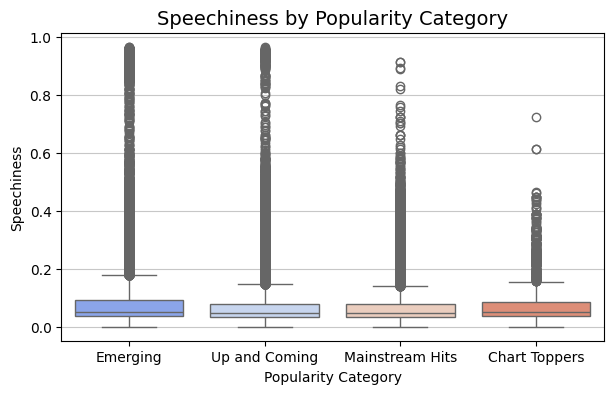

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


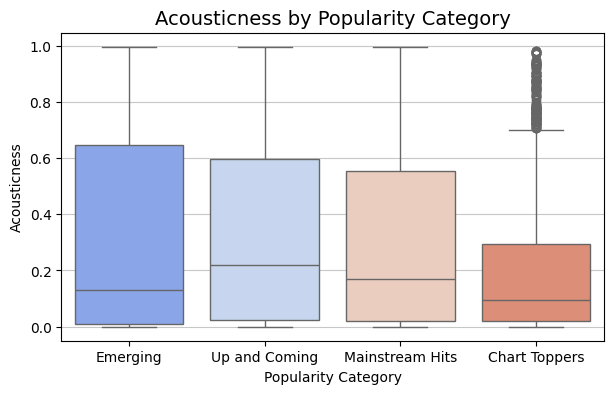

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


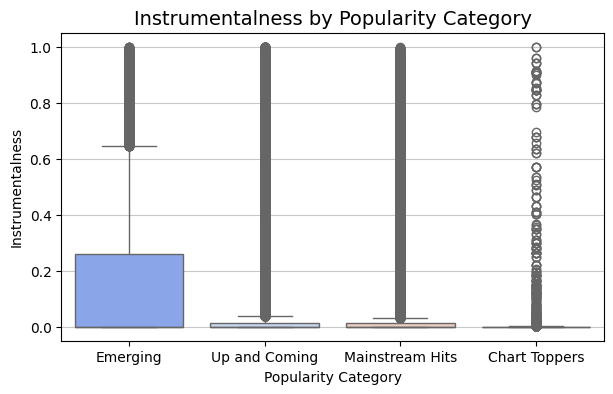

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


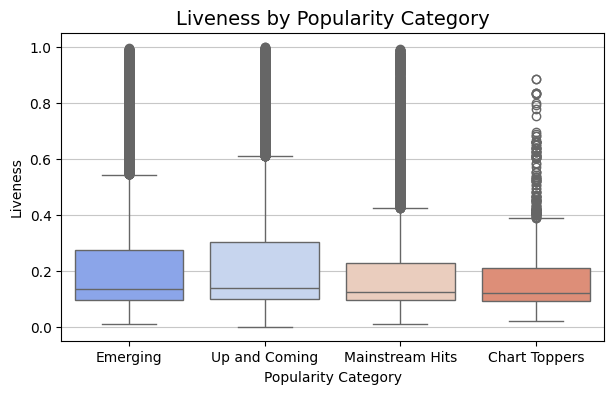

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


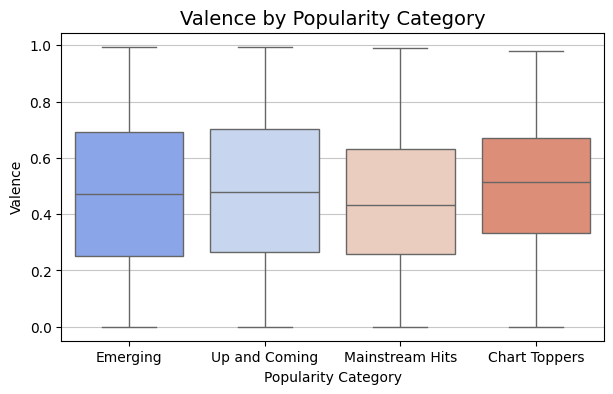

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


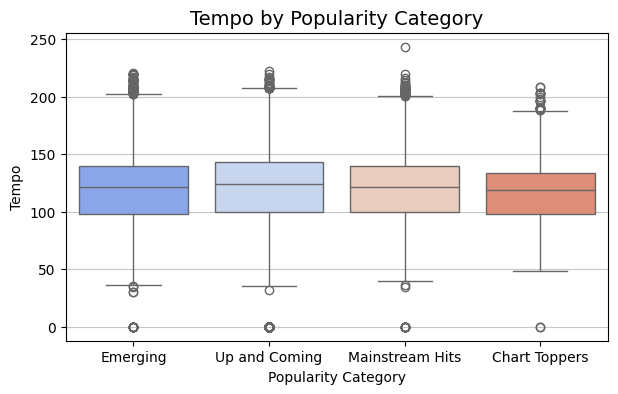

/tmp/ipython-input-735143793.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')


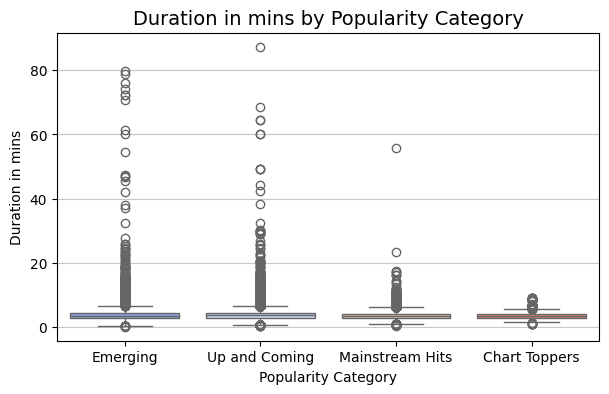

In [29]:
## Bivariate Analysis

# List of numerical features (excluding popularity itself)
num_features = ['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence',
                'tempo', 'duration in mins']

# Loop through features and plot
for feature in num_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='popularity category', y=feature, data=df, palette= 'coolwarm')
    plt.title(f"{feature.capitalize()} by Popularity Category", fontsize=14)
    plt.xlabel("Popularity Category")
    plt.ylabel(feature.capitalize())
    plt.grid(axis='y', alpha=0.7)
    plt.show()

In [30]:
## Changing data type from bool to int

df['explicit'] = df['explicit'].astype(int)
df.dtypes

,0
artists,object
popularity,int64
explicit,int64
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64


In [31]:
# Grouping by 'popularity category' and getting the mean of each feature per category

category_mean = df.groupby('popularity category', observed = True).mean(numeric_only= True)

# Sorting the resulting DataFrame by 'popularity' in descending order for better readability
category_mean.sort_values(by='popularity', ascending=False)

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration in mins,signature time
popularity category,,,,,,,,,,,,,,,
Chart Toppers,80.464345,0.199420,0.633238,0.677127,5.403400,-6.373414,0.588308,0.079771,0.196727,0.029404,0.170818,0.507765,119.478244,3.603317,3.945688
Mainstream Hits,60.371778,0.105980,0.577939,0.627075,5.289205,-8.107300,0.617880,0.075050,0.303546,0.119261,0.185720,0.450708,121.645250,3.678745,3.920782
Up and Coming,38.754562,0.070406,0.566207,0.647548,5.309354,-8.134430,0.653527,0.079470,0.324552,0.138451,0.236610,0.485895,123.223767,3.878379,3.907778
Emerging,10.060091,0.081768,0.558097,0.643856,5.315755,-8.526973,0.636747,0.095503,0.316631,0.200322,0.210181,0.474890,121.634557,3.812543,3.889018


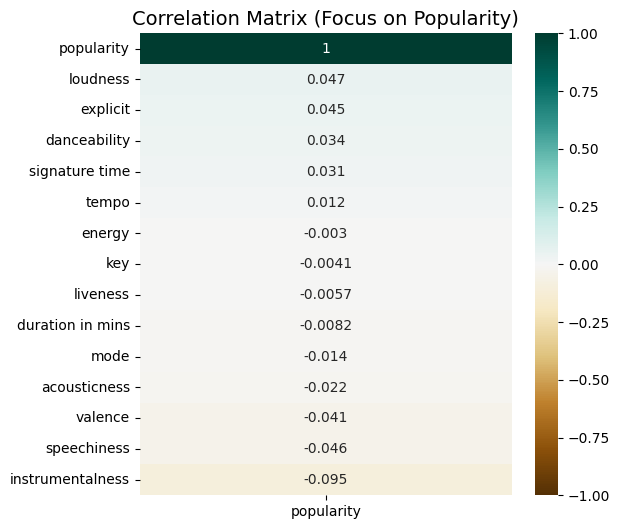

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations with 'popularity'
corr_matrix = numeric_df.corr()

# Focus on popularity only
corr_with_popularity = corr_matrix[['popularity']].sort_values(by='popularity', ascending=False)

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr_with_popularity, annot=True, cmap='BrBG', center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Focus on Popularity)", fontsize=14)
plt.show()

**Statistical Hypothesis Testing**

In [33]:
## Pearson Correlation Coeffecient Test

from scipy.stats import pearsonr

corr_pvals = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'popularity':
        r, p = pearsonr(df[col], df['popularity'])
        corr_pvals[col] = {'Correlation': r, 'p-value': p}

pd.DataFrame(corr_pvals).T.sort_values(by='p-value')

,Correlation,p-value
instrumentalness,-0.095300,4.939872e-227
loudness,0.047268,4.079181e-57
speechiness,-0.045825,8.676671e-54
explicit,0.044543,6.462854e-51
valence,-0.041328,4.512423e-44
danceability,0.033795,4.986383e-30
signature time,0.030580,6.957869e-25
acousticness,-0.022415,4.359557e-14
mode,-0.014434,1.166440e-06
tempo,0.012151,4.272096e-05


In [34]:
## ANOVA Test

import scipy.stats as stats

# Initialising a dictionary to hold p-values for each feature
p_values = {}

# List of features to perform ANOVA on
features = ['explicit', 'duration in mins', 'danceability', 'loudness', 'instrumentalness', 'valence', 'speechiness']

# Performing ANOVA for each feature
for feature in features:
    # Extracting the groups
    group1 = df[df['popularity category'] == 'Chart Toppers'][feature]
    group2 = df[df['popularity category'] == 'Mainstream Hits'][feature]
    group3 = df[df['popularity category'] == 'Up and Coming'][feature]
    group4 = df[df['popularity category'] == 'Emerging'][feature]

    # Performing ANOVA and storing the p-value
    f_stat, p_value = stats.f_oneway(group1, group2, group3, group4)
    p_values[feature] = p_value

print(p_values)

{'explicit': np.float64(2.098292260252545e-144), 'duration in mins': np.float64(6.245228160091247e-50), 'danceability': np.float64(2.1702183252697142e-123), 'loudness': np.float64(1.673693455039478e-111), 'instrumentalness': np.float64(0.0), 'valence': np.float64(3.815034028388421e-72), 'speechiness': np.float64(1.939750361025254e-168)}


In [35]:
## T - Test for Explicit V/S Non Explicit

from scipy.stats import ttest_ind

explicit_group = df[df['explicit'] == 1]['popularity']
non_explicit_group = df[df['explicit'] == 0]['popularity']

t_stat, p_val = ttest_ind(explicit_group, non_explicit_group, equal_var=False)
print("T-test p-value:", p_val)

T-test p-value: 2.1853757359439523e-43


**Model Fitting**

In [36]:
## Train - Test split : 80 - 20

X = df.drop(columns=['popularity'])
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(90737, 19)
(22685, 19)


In [37]:
## Label Encoding and Standard Scaling

df = df.drop(columns=['popularity category'])

le = LabelEncoder()
categorical_cols = ['artists', 'name of album', 'name of track', 'genre of track']
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

X = df.drop('popularity', axis=1)  # Features
y = df['popularity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear, Lasso and Ridge Regression using Grid Search CV**

In [ ]:
# Function to calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Dictionary to store results
results = []

# Models and their parameter grids
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'positive': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': np.logspace(-4, 4, 20),
            'fit_intercept': [True, False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
    },
    'Lasso': {
        'model': Lasso(max_iter=5000),
        'params': {
            'alpha': np.logspace(-4, 1, 20),
            'fit_intercept': [True, False]
        }
    }
}

# Loop through models
for name, config in models.items():
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid.fit(X_train_scaled, y_train)
    y_pred = grid.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, len(y_test), X_test_scaled.shape[1])
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'R² (Test)': r2,
        'Adjusted R²': adj_r2,
        'MAE': mae,
        'RMSE': rmse
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

              Model                                        Best Params  \
0  LinearRegression         {'fit_intercept': True, 'positive': False}   
1             Ridge  {'alpha': 545.5594781168514, 'fit_intercept': ...   
2             Lasso  {'alpha': 0.00379269019073225, 'fit_intercept'...   

   R² (Test)  Adjusted R²        MAE       RMSE  
0   0.028639     0.027868  18.340708  22.018016  
1   0.028629     0.027858  18.343662  22.018131  
2   0.028631     0.027859  18.342043  22.018113  


**Random Forest using Randomized Search CV**

In [39]:
# Define parameter distribution (narrower ranges for speed)
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],         # fewer values
    'max_depth': [None, 10, 15, 20, 25],               # limit depth
    'min_samples_split': [2, 5, 10],                   # small list
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']                   # skip 'auto' for faster results
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Randomized Search with reduced iterations and folds
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                 # only 20 random combinations
    cv=3,                      # fewer folds
    verbose=2,                 # progress output
    random_state=42,
    n_jobs=-1,                  # use all CPU cores
    scoring='r2'
)

# Fit to data
random_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25}
Best R² Score: 0.4932678732458342


In [40]:
best_rf = random_search.best_estimator_
final_predictions_rf = best_rf.predict(X_test)
print("Test R²:", r2_score(y_test, final_predictions_rf))
print("Test Adjusted R²:", 1 - (1 - r2_score(y_test, final_predictions_rf)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
print("MAE:", mean_absolute_error(y_test, final_predictions_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_predictions_rf)))

Test R²: 0.5556666208071259
Test Adjusted R²: 0.5553137574511976
MAE: 11.429969774436433
RMSE: 14.891634477149408


**AdaBoost using Randomized Search CV**

In [ ]:
ada = AdaBoostRegressor(random_state=42)

param_dist_ada = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': np.linspace(0.01, 1.0, 10)
}

random_search_ada = RandomizedSearchCV(
    ada,
    param_distributions=param_dist_ada,
    n_iter=20,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search_ada.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", random_search_ada.best_params_)
print("Best R² Score:", random_search_ada.best_score_)

Best Parameters: {'n_estimators': np.int64(300), 'learning_rate': np.float64(0.01)}
Best R² Score: 0.04775266600350155


In [ ]:
best_ada = random_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred_ada))
print("Test Adjusted R²:", 1 - (1 - r2_score(y_test, y_pred_ada)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
print("MAE:", mean_absolute_error(y_test, y_pred_ada))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ada)))

Test R²: 0.050182608969102094
Test Adjusted R²: 0.04942832003243236
MAE: 18.240465709508157
RMSE: 21.77248281989587


**Gradient Boosting using Randomized Search CV**

In [ ]:
gb = GradientBoostingRegressor(random_state=42)

param_dist_gb = {
    'n_estimators': np.arange(100, 301, 100),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

random_search_gb = RandomizedSearchCV(
    gb,
    param_distributions=param_dist_gb,
    n_iter=30,
    scoring='r2',
    cv=2,
    random_state=42,
    n_jobs=-1
)

random_search_gb.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", random_search_gb.best_params_)
print("Best R² Score:", random_search_gb.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': np.int64(300), 'max_depth': 5, 'learning_rate': 0.1}
Best R² Score: 0.47952868110406194


In [ ]:
best_gb = random_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred_gb))
print("Test Adjusted R²:", 1 - (1 - r2_score(y_test, y_pred_gb)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

Test R²: 0.49571518700394734
Test Adjusted R²: 0.4953147137561784
MAE: 12.056898175466994
RMSE: 15.864480036409686


**XGBoost using Randomized Search CV**

In [41]:
xgb_param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)
print("Best Params (XGB):", xgb_random.best_params_)
print("Best CV RMSE (XGB):", -xgb_random.best_score_)

Best Params (XGB): {'subsample': 1.0, 'n_estimators': np.int64(150), 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best CV RMSE (XGB): 14.12204475402832


In [42]:
best_xgb = xgb_random.best_estimator_
final_predictions_xgb = best_xgb.predict(X_test)
print("Test R²:", r2_score(y_test, final_predictions_xgb))
print("Test Adjusted R²:", 1 - (1 - r2_score(y_test, final_predictions_xgb)) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))
print("MAE:", mean_absolute_error(y_test, final_predictions_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_predictions_xgb)))

Test R²: 0.6086165308952332
Test Adjusted R²: 0.6083057172340717
MAE: 10.278728485107422
RMSE: 13.976201674877046


**Feature Importance**

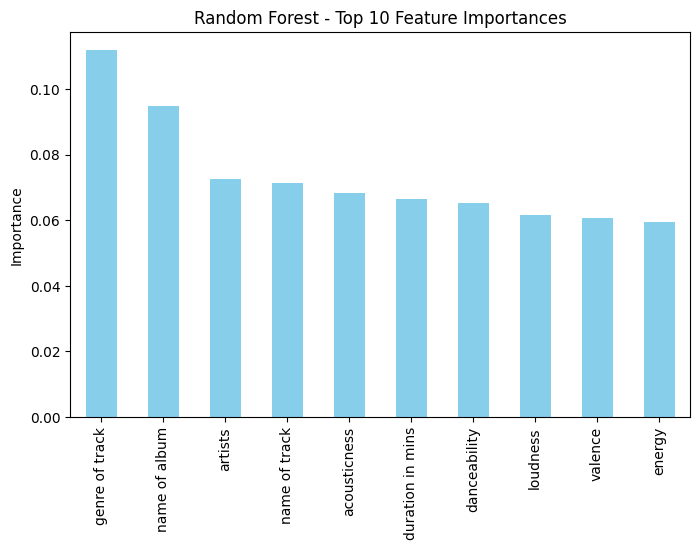

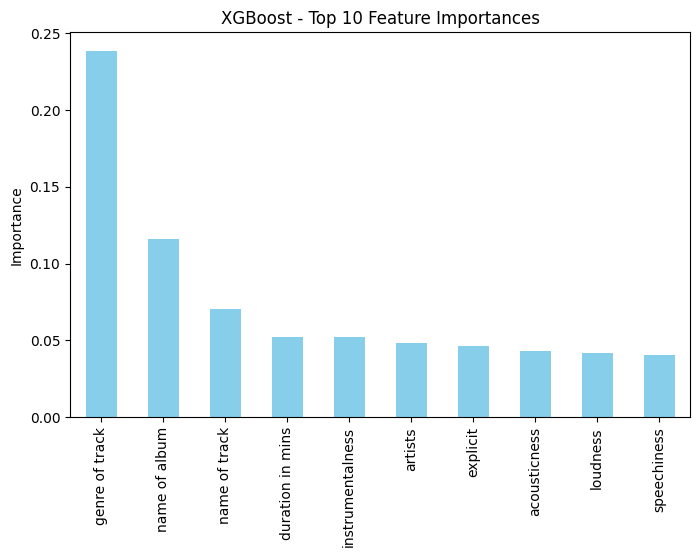

In [ ]:
# Random Forest feature importance
rf_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# XGBoost feature importance
xgb_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
def plot_importance(importances, title):
    plt.figure(figsize=(8,5))
    importances.head(10).plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.ylabel("Importance")
    plt.show()

plot_importance(rf_importances, "Random Forest - Top 10 Feature Importances")
plot_importance(xgb_importances, "XGBoost - Top 10 Feature Importances")

**Generating List of Top Songs by Predicted Popularity Score**

       name of track  Predicted Popularity rf
36927          36927                88.425266
57044          57044                86.974542
40540          40540                85.182381
9253            9253                84.146585
17109          17109                83.620705
60758          60758                83.496273
44591          44591                81.879074
67580          67580                81.378555
50034          50034                79.126385
31984          31984                78.381794


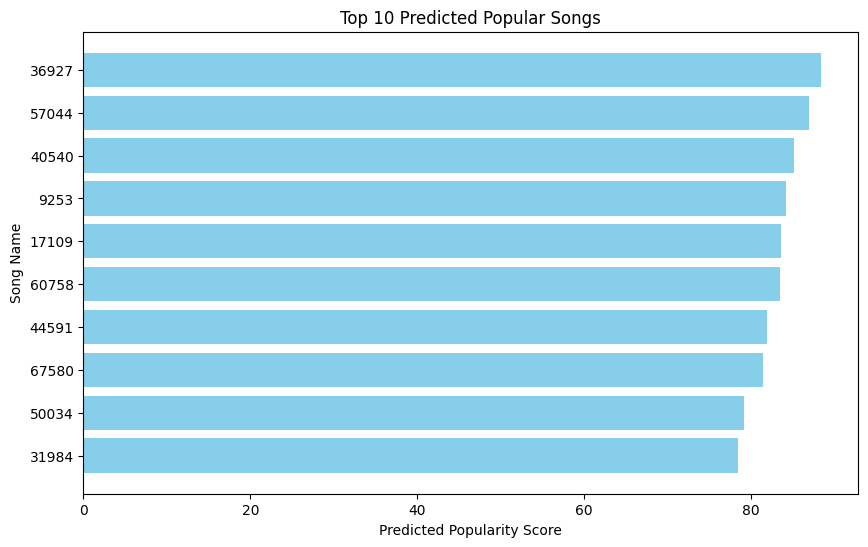

In [52]:
## Generating List of Top Songs using Random Forest Predictions

# Predict on entire dataset
df["Predicted Popularity rf"] = best_rf.predict(X)
df["Predicted Popularity rf"] = df["Predicted Popularity rf"].clip(0, 100)

# Aggregate predictions by unique track
top_songs_rf = (
    df.groupby("name of track")["Predicted Popularity rf"]
      .mean()
      .reset_index()
      .sort_values(by="Predicted Popularity rf", ascending=False)
      .head(10)
)

print(top_songs_rf)

# Plot top songs

plt.figure(figsize=(10,6))
plt.barh(top_songs_rf["name of track"].astype(str), top_songs_rf["Predicted Popularity rf"], color="skyblue")
plt.xlabel("Predicted Popularity Score")
plt.ylabel("Song Name")
plt.title("Top 10 Predicted Popular Songs")
plt.gca().invert_yaxis()
plt.show()


       name of track  Predicted Popularity
36927          36927             93.310684
57044          57044             88.523697
67580          67580             86.114624
62652          62652             82.446236
14572          14572             81.667130
44591          44591             81.412323
60758          60758             80.913010
49941          49941             80.649887
1609            1609             80.643608
2233            2233             80.201645


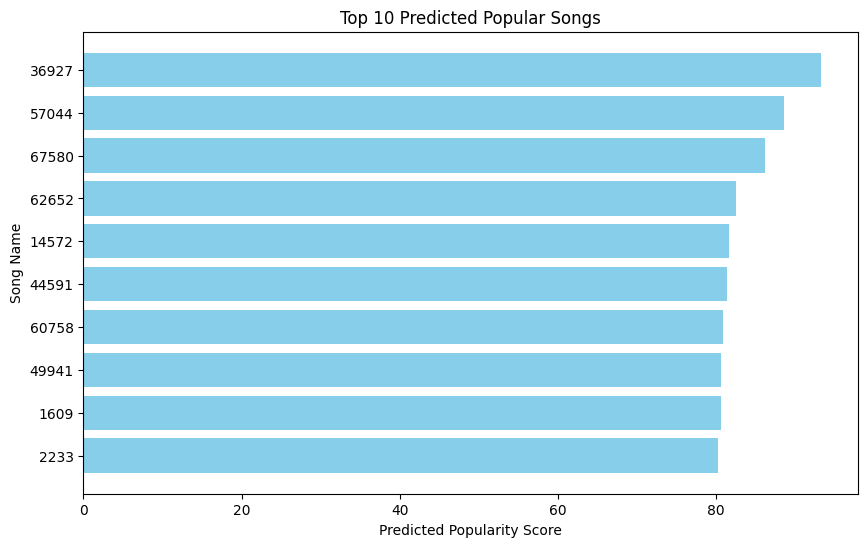

In [58]:
## Generating List of Top Songs using XGBoost Predictions

# Predict on entire dataset
df["Predicted Popularity"] = best_xgb.predict(X)
df["Predicted Popularity"] = df["Predicted Popularity"].clip(0, 100)

# Aggregate predictions by unique track
top_songs = (
    df.groupby("name of track")["Predicted Popularity"]
      .mean()
      .reset_index()
      .sort_values(by="Predicted Popularity", ascending=False)
      .head(10)
)

print(top_songs)

# Plot top songs

plt.figure(figsize=(10,6))
plt.barh(top_songs["name of track"].astype(str), top_songs["Predicted Popularity"], color="skyblue")
plt.xlabel("Predicted Popularity Score")
plt.ylabel("Song Name")
plt.title("Top 10 Predicted Popular Songs")
plt.gca().invert_yaxis()
plt.show()


**Insights from Random Forest Feature Importance**

**Genre of track** is the most influential factor in predicting popularity — aligning with the fact that certain genres naturally attract larger audiences.

**Name of album and artist** identity also play a strong role, suggesting that brand recognition significantly impacts how popular a song becomes.

**Track name** has measurable influence — possibly due to keywords, cultural references, or familiarity.

Among audio features, **acousticness, danceability, loudness, and energy** contribute meaningfully, indicating that the sound profile of a song affects audience reception.

**Duration matters** — songs that are too short or too long may not fit typical streaming consumption patterns.

**Business Takeaway:**

By focusing on the top influential factors (e.g., genre, artist reputation, energy level), music companies can strategically design and market tracks to align with listener preferences, improving chances of higher popularity.

As we can see album name, track genre, track name, artist and its acousticness hold the most importance while deciding whether a song will be a hit or not.

**Conclusion**

In conclusion, the analysis of the Spotify dataset revealed significant trends in music tracks and listeners' preferences. This project successfully linked musical elements like energy and danceability to a song’s popularity and highlighted the variety in musical genres available on Spotify. The predictive models, especially the Random Forest Regressor & XGBoost Regressor, showed the capability of machine learning in predicting song popularity. This study serves as a stepping stone to further, more in-depth research into music analytics and user preferences.